In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

In [9]:
# Generate synthetic dataset
X, y = make_moons(n_samples=1000, noise=0.1)
X = torch.FloatTensor(X)
y = torch.LongTensor(y)

In [10]:
# Define the neural network
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(2, 5)  # input layer to hidden layer
        self.fc2 = nn.Linear(5, 2)   # hidden layer to output layer

    def forward(self, x):
        x = torch.relu(self.fc1(x))  # Activation function
        return self.fc2(x)            # Output layer

In [11]:
# Initialize the model, loss function, and optimizer
model = SimpleNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)


In [12]:
# Training loop
for epoch in range(1000):
    # Forward propagation
    outputs = model(X)
    loss = criterion(outputs, y)

    # Backward propagation
    optimizer.zero_grad()  # Clear previous gradients
    loss.backward()        # Compute gradients
    optimizer.step()       # Update weights

    # Print loss every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/1000], Loss: {loss.item():.4f}')

Epoch [100/1000], Loss: 0.6537
Epoch [200/1000], Loss: 0.5912
Epoch [300/1000], Loss: 0.5531
Epoch [400/1000], Loss: 0.5239
Epoch [500/1000], Loss: 0.4988
Epoch [600/1000], Loss: 0.4769
Epoch [700/1000], Loss: 0.4573
Epoch [800/1000], Loss: 0.4393
Epoch [900/1000], Loss: 0.4228
Epoch [1000/1000], Loss: 0.4074


In [13]:
# Example of testing the model
with torch.no_grad():
    test_output = model(X)
    predicted = torch.argmax(test_output, dim=1)
    accuracy = (predicted == y).float().mean()
    print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.8030


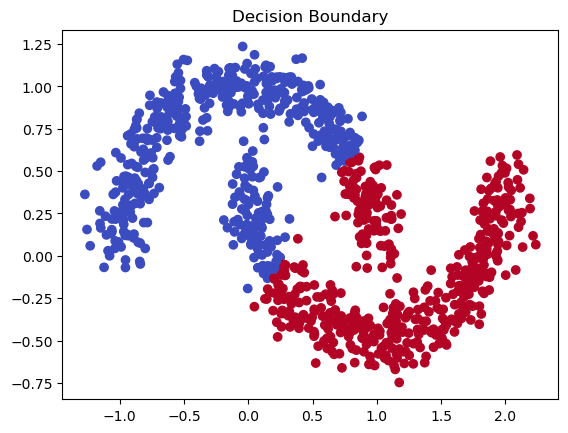

In [14]:
# Optionally visualize the results
plt.scatter(X[:, 0], X[:, 1], c=predicted.numpy(), cmap='coolwarm')
plt.title('Decision Boundary')
plt.show()